## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
vac_data=pd.merge(mouse_metadata, study_results, how='outer',on='Mouse ID')
vac_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
volumes = vac_data['Tumor Volume (mm3)']

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [11]:
import numpy as np

mean_numpy = np.mean(volumes)
median_numpy = np.median(volumes)
var_numpy = np.var(volumes,ddof = 0)
sd_numpy = np.std(volumes,ddof = 0)
sems = [st.sem(volumes)]

In [12]:
summary_df = pd.DataFrame({"Mean Tumor Volume": [mean_numpy],
                           "Median Tumor Volume": [median_numpy],
                          "Volume Variance": [var_numpy],
                          "Volume Std Dev": [sd_numpy],
                          "Volume SEM":[sems]})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Volume Variance,Volume Std Dev,Volume SEM
0,50.448381,48.951474,79.07428,8.892372,[0.20443585034961514]


## Bar plots

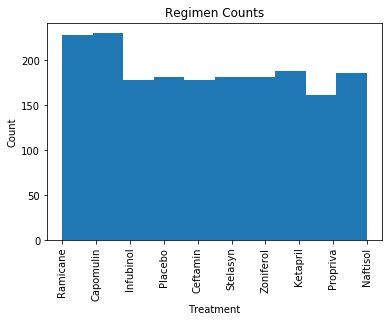

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#treatments = vac_data["Drug Regimen"].value_counts()
#treatments.hist()
plt.hist(vac_data['Drug Regimen'])
plt.title("Regimen Counts")
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

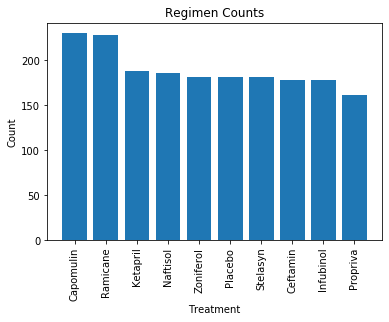

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatments = vac_data["Drug Regimen"].unique()
x_axis = np.arange(len(treatments))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Regimen Counts")
plt.xlabel("Treatment")
plt.ylabel("Count")

x_axis_labels = ["Capomulin", "Ramicane","Ketapril", "Naftisol","Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
data_points = vac_data['Drug Regimen'].value_counts()
plt.bar(x_axis,data_points)
plt.xticks(tick_locations, labels, rotation=90)
plt.show()

## Pie plots

([<matplotlib.patches.Wedge at 0x15f7b32ebc8>,
 [Text(-0.02099250347258543, 1.0997996703027118, ''),
  Text(0.020992503472585782, -1.0997996703027118, '')])

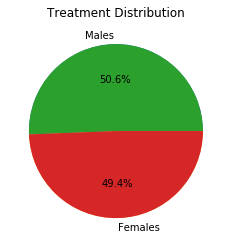

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_points = vac_data['Sex'].value_counts()
plt.title("Treatment Distribution")
plt.pie(data_points, labels=sex,autopct="%1.1f%%")
plt.pie(data_points)

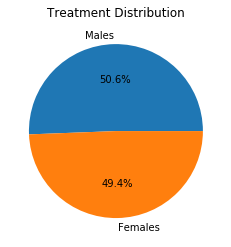

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Males","Females"]
data_points = vac_data['Sex'].value_counts()

plt.title("Treatment Distribution")
plt.pie(data_points, labels=sex,autopct="%1.1f%%")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen